### importing all relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

### loading the data into data variable

In [2]:
data= pd.read_csv('real_estate_price_size_year_view.csv')

In [3]:
new_data= data.copy()

### mapping categorical variables into numerical

In [4]:
new_data['view']=new_data['view'].map({'No sea view':0,'Sea view':1})

In [5]:
new_data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [6]:
new_data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


## create regression. 

### declaring dependent and independent variables

In [7]:
y=new_data['price'].values.reshape(-1,1)
x1=new_data[['size','view','year']]

### getting summary of overall data

#### p value of each variable indicates whether feature is important or not.
#### feature with less that .05 p value are important

####  r^2 explains the goodness of fit
####  addjusted r^2 tells whether increasing feature has a good impact on label or not

In [8]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Fri, 21 May 2021   Prob (F-statistic):           1.02e-50
Time:                        20:01:12   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

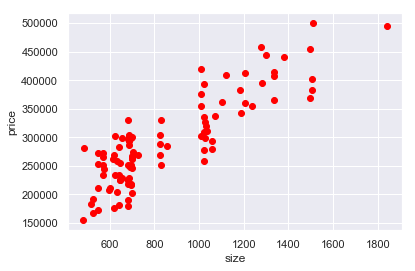

In [9]:
plt.scatter(new_data['size'],y,c='red')
plt.xlabel('size')
plt.ylabel('price')
plt.show()

#### library to split the data into two parts
#### one for training other one for testing

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x1,y,test_size=0.2,random_state=24)

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### finding the coeffients of feature

In [12]:
reg.coef_

array([[  219.03963497, 59335.78340648,  2612.11003804]])

#### finding the intercept

In [13]:
reg.intercept_

array([-5181391.98508669])

In [14]:
reg.score(x1,y)

0.9122759184455712

In [15]:
reg.predict([[643.09,0,2016]])

array([[225484.05045697]])

In [16]:
y_pred = reg.predict(x_test)

#### prediction based on user input

In [ ]:
size = float(input('enter size of the house:  '))
view= str(input('is there a sea view:  '))
if (type(view)!= str):
    print('enter yes or no')
    view= str(input('is there a sea view:  '))
if (view=='no'):
    view=0
else:
    view=1
year= int(input('year of manufacture:  '))
output= reg.predict([[size,view,year]])
print(output)